In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from credit_decision_tree import DecisionTree

rand_seed = 41

In [2]:
train, test = train_test_split(
    pd.read_csv("cred_record_train_test.csv")
)
train.shape, test.shape

((583286, 21), (194429, 21))

In [15]:
train.STATUS.value_counts()

 1    247183
-1    217901
 0    109524
-2      6551
-6      1150
-3       597
-4       211
-5       169
Name: STATUS, dtype: int64

In [3]:
test.head()

,Unnamed: 0,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
336595,336595,5066399,-33,C,F,N,Y,1,675000.0,Commercial associate,...,Married,House / apartment,-15944,-1467,1,0,1,0,NaN,3.0
776500,776500,5150386,-6,X,F,N,Y,0,90000.0,Commercial associate,...,Single / not married,House / apartment,-19791,-3172,1,0,1,0,NaN,1.0
350507,350507,5067261,-32,X,F,Y,Y,0,270000.0,Working,...,Married,House / apartment,-19982,-1724,1,0,1,0,NaN,2.0
623320,623320,5117865,-3,C,F,N,N,0,157500.0,Commercial associate,...,Married,House / apartment,-17366,-3080,1,0,0,0,Core staff,2.0
297540,297540,5061313,-24,C,F,N,Y,0,202500.0,Working,...,Married,House / apartment,-19317,-6590,1,1,1,1,Laborers,2.0


In [4]:
predictors = [
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "FLAG_MOBIL",
    "FLAG_WORK_PHONE",
    "FLAG_PHONE",
    "FLAG_EMAIL",
    "OCCUPATION_TYPE",
    "CNT_FAM_MEMBERS"
]

In [5]:
status_codes = {
    "C": 1,
    "X": 0,
    "0": -1,
    "1": -2,
    "2": -3,
    "3": -4,
    "4": -5,
    "5": -6
}
train["STATUS"].replace(status_codes, inplace=True)
test["STATUS"].replace(status_codes, inplace=True)

In [16]:
import time
start = time.time()
size = train.shape[0] // 10
cred_tree = DecisionTree(size // 10, 0.95).fit(predictors, target="STATUS", data=train.iloc[:size, :])
end = time.time()
print(end - start)
print(len(cred_tree.leaf_nodes_))

KeyboardInterrupt: 

In [ ]:
pmf = pd.Series(0, index=np.arange(-6,2))
leaf_probs = train.iloc[:size, :].STATUS.value_counts() / size
pmf[leaf_probs.index] = leaf_probs
pmf.sort_index(inplace=True)
plt.bar(pmf.index, pmf.values)
plt.ylim((0,1))
plt.show()

for idx, leaf in enumerate(cred_tree.leaf_nodes_):
    pmf = pd.Series(0, index=np.arange(-6,2))
    leaf_probs = leaf.STATUS.value_counts() / leaf.shape[0]
    pmf[leaf_probs.index] = leaf_probs
    pmf.sort_index(inplace=True)
    plt.bar(pmf.index, pmf.values)
    plt.ylim((0,1))
    plt.show()

In [45]:
train.STATUS.dtype

dtype('int64')

<StemContainer object of 3 artists>

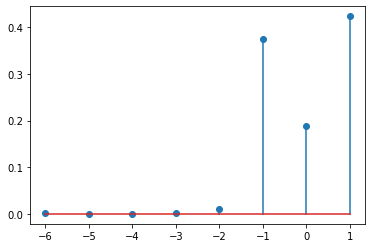

In [55]:
priors = train.STATUS.value_counts()/train.shape[0]
priors.sort_index(inplace=True)
plt.stem(priors.index, priors.values)

<StemContainer object of 3 artists>

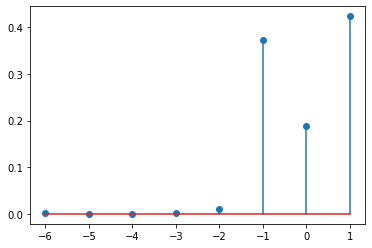

In [54]:
priors = test.STATUS.value_counts() / test.shape[0]
priors.sort_index(inplace=True)
plt.stem(priors.index, priors.values)

In [21]:
status_codes = {
    "C": 1,
    "X": 0,
    "0": -1,
    "1": -2,
    "2": -3,
    "3": -4,
    "4": -5,
    "5": -6
}

In [23]:
train["STATUS"].value_counts()

 1    247165
-1    218093
 0    109414
-2      6546
-6      1124
-3       575
-4       218
-5       151
Name: STATUS, dtype: int64

In [25]:
test["STATUS"].value_counts()

 1    82371
-1    72561
 0    36536
-2     2201
-6      403
-3      226
-4       68
-5       63
Name: STATUS, dtype: int64

In [42]:
grouped = train.groupby(predictors)
grouped

In [44]:
grouped.

85, 418743, 418783, 418751, 418678, 418788,
             418672, 418768, 418770, 418665, 418696, 418701, 418702, 418666,
             418744, 418761, 418683, 418760, 418708, 418688, 418684, 418709,
             418717, 418728, 418714, 418758, 418721, 418690, 418764, 418779,
             418675, 418790, 418697, 418750, 418710, 418680, 418756, 418755,
             418676, 418769, 418747, 418739, 418691, 418771, 418763, 418746,
             418781, 418712, 418776, 418726, 418777, 418669, 418759, 418727,
             418725, 418789, 418748, 418785, 418767, 418695, 418699, 418749,
             418780, 418689, 418715, 418704, 418740, 418679, 418711, 418700,
             418731, 418706, 418693, 418778, 418722, 418782, 418729, 418754,
             418762, 418705, 418766, 418677, 418682, 418713, 418757],
            dtype='int64'),
 ('F',
  'N',
  'N',
  0,
  225000.0,
  'Working',
  'Higher education',
  'Single / not married',
  'Rented apartment',
  -18173,
  -777,
  1,
  0,
  0,
  0,
  'Sal